# Exploratory Data Analysis:

### Importing Libraries for the Project

In [2]:
import numpy as np                  # Manupulation of Multidimensional array and matrix
import matplotlib.pyplot as plt     # For Visualisation
import pandas as pd                 # Loading Dataset and Manupulation
import seaborn as sns               #Plotting more attracting graphs and chart
from numpy import array 

#For Upsampling to reduce Imbalance in dataset
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

#For Encoding The Data
from sklearn.preprocessing import OneHotEncoder,StandardScaler

#For Performing the Logistic Regression
from sklearn.linear_model import LogisticRegression

#For getting the F-1 score,Precision,recall etc.
from sklearn.metrics import classification_report

#For getting the Confusion Matrix,Accuracy of the Model,Loss etc.
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score,cohen_kappa_score

#For Splitting the Dataset into train-test and Performing Cross Validation Score
from sklearn.model_selection import train_test_split,cross_val_score, KFold

#For Performing HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#For Performing Support Vector Machine
from sklearn.svm import SVC,LinearSVC

#For Performing XGBOOST Classifier Algorithm
from xgboost import XGBClassifier
import xgboost as xgb

#For Performing Random Forest Classifier to find top features
from sklearn.ensemble import RandomForestClassifier

#For Performing Adaboost Classifier Algorithm
from sklearn.ensemble import AdaBoostClassifier

#For Performing MLP Classifier i.e. Neural Network
from sklearn.neural_network import MLPClassifier

#For deploying model and Building Web Application
from flask import Flask, render_template, request
from werkzeug.wrappers import Request, Response

#To save the model
import pickle

In [ ]:
#Links used to build the Capstone

# Blog to Handle Missing Value in Dataset
# https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/#:~:text=%205%20Ways%20To%20Handle%20Missing%20Values%20In,not%20have%20missing%20values%2C%20we%20can...%20More%20

# Best blog to understand One Hot Encoding
# https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is%20a%20representation%20of,Let%E2%80%99s%20make%20this%20concrete%20with%20a%20worked%20example.

# Blog For Classification Report
# https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

# Blog For Smote Sampling
# https://www.kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/

# Blog for MLP Classifier
# https://www.python-machinelearning.com/scikit-learn-multi-layer-perceptron-mlp-classifier/

# Blog for Logistic Regression
# https://realpython.com/logistic-regression-python/#:~:text=%20Logistic%20Regression%20in%20Python%20With%20StatsModels%3A%20Example,...%20The%20obtained%20array%20contains%20the...%20More%20

# Blog for Normalization and Standard Scalar
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

# Blog for EDA
# https://towardsdatascience.com/eda-exploratory-data-analysis-to-get-more-insight-into-the-data-b2fb74dabb82

# Blog for XGBoost
# https://xgboost.readthedocs.io/en/latest/python/python_api.html

# Blog for AdaBoost
# https://www.datacamp.com/community/tutorials/adaboost-classifier-python

# Blog for SVC
# https://www.edureka.co/blog/support-vector-machine-in-python/

In [3]:
#Loading the Dataset
data=pd.read_csv("train.csv")

In [33]:
#printing the Columns from Dataset
print(data.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [4]:
#Printing the first 5 rows of Dataset
print(data.head())

In [3]:
#Printing The Shape
print(data.shape)

(595212, 59)


In [6]:
#Describe the dataset in terms of mean,median,mode etc.
data.describe()

In [10]:
#Creating The Dummy Data for Understanding the dataset
dummy=data.head(1000)
dummy.to_csv("dummy.csv")

<AxesSubplot:>

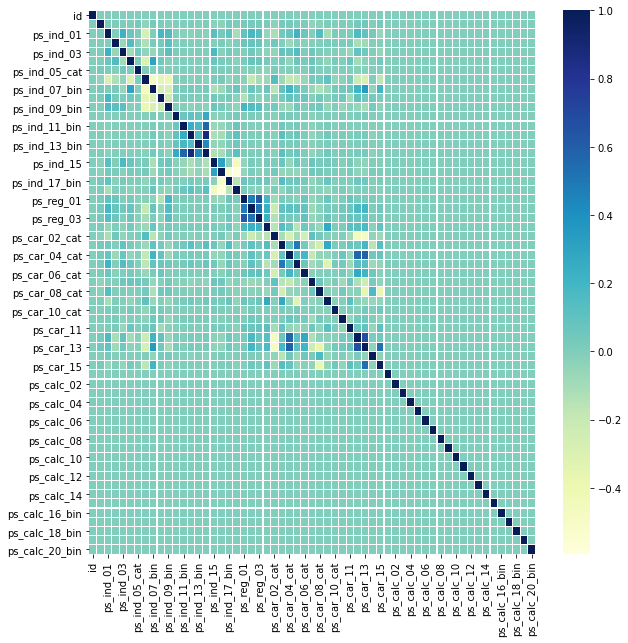

In [11]:
#dummy.corr
#Plotting Heatmap of Correlation Matrix 
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [12]:
#Finding insight of dataset with better visualisation
from pandas_profiling import ProfileReport
ProfileReport(data.head(6))

In [42]:
#data.corr()
#finding Correlation of independent variable with Target Variable
test=data[data.columns[1:]].corr()['target'][:]

C:\Users\vikas.maurya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


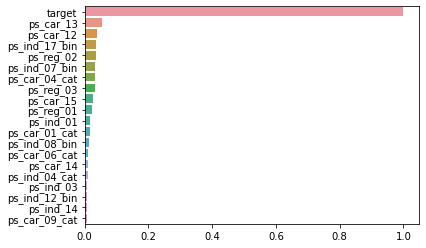

C:\Users\vikas.maurya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


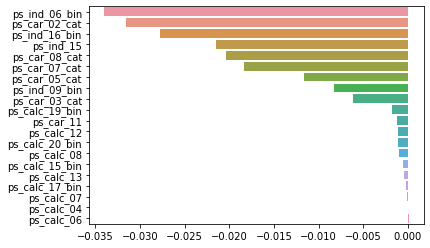

In [43]:
#Sorting The Feature According to their Correlation Value to ascending order
inference=test.sort_values(ascending=False).head(20)
inference1=test.sort_values().head(20)

#Sorting The Feature According to their Correlation Value to Descending order
sns.barplot(inference.values,inference.keys())
plt.show()

sns.barplot(inference1.values,inference1.keys())
plt.show()

## 1.Write at least 3 important inferences from the data above

In [44]:
#After seeing the above plot we can find the top 5 correlated and non-correlated columns.
keyCol=inference.keys()
keyColn=inference1.keys()

In [45]:
#inference 1
print("The below 10 columns are highly correlated")
for i in range(1,11):
    print(keyCol[i])

The below 10 columns are highly correlated
ps_car_13
ps_car_12
ps_ind_17_bin
ps_reg_02
ps_ind_07_bin
ps_car_04_cat
ps_reg_03
ps_car_15
ps_reg_01
ps_ind_01


In [46]:
print("The below 10 columns are highly uncorrelated")
for i in range(0,10):
    print(keyColn[i])

The below 10 columns are highly non-correlated
ps_ind_06_bin
ps_car_02_cat
ps_ind_16_bin
ps_ind_15
ps_car_08_cat
ps_car_07_cat
ps_car_05_cat
ps_ind_09_bin
ps_car_03_cat
ps_calc_19_bin


In [ ]:
#inference 2
Print("After Seeing the Correlation of heatmap we can say that most of the data Independent that is uncorrelated")

In [10]:
#inference 3
print("ID column is irrelevant column,so we can drop from tha dataset,it will does not affect the accuracy")

In [3]:
#inference 4
print("Data is higly imblaced, target distribtion is:")

print("0 = 96.36 %")

print("1 = 3.64 %")

Data is higly imblaced, target distribtion is:
0 = 96.36 %
1 = 3.64 %


## 2.Is the data balanced? Meaning are targets 0 and 1 in right proportion?

In [5]:
Y=data["target"]
Y.unique()
Y.value_counts()
x_zero=Y.value_counts()
diff=x_zero[0]-x_zero[1]
total=x_zero[0]+x_zero[1]
print("Target Variables are not balanced since difference between them is very high that is:",diff)
print("The proportion is wrong it has one class very high and the second class is very low  ",x_zero[0]/total,":",x_zero[1]/total)
print("Data is higly imblaced, target distribtion is:")
print("0 = 96.36 %")
print("1 = 3.64 %")

Target Variables are not balanced since difference between them is very high that is: 551824
The proportion is wrong it has one class very high and the second class is very low   0.963552482140817 : 0.036447517859182946
Data is higly imblaced, target distribtion is:
0 = 96.36 %
1 = 3.64 %


Percentge distribution of class '1' & class '0':

 0    96.355248
1     3.644752
Name: target, dtype: float64


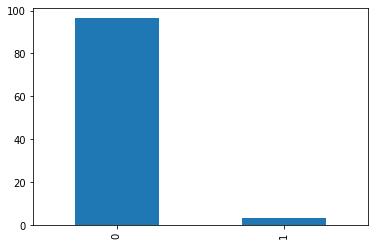

In [8]:
perc = (data['target'].value_counts()/(data.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

## 3.How many categorical features are there?

In [3]:
col=data.columns.values
cat=[i for i in col if 'cat' in i]
print("Number of Categorical Features: ")
print(len(cat))

Number of Categorical Features: 
14


## 4.How many binary features are there?

In [4]:
col=data.columns.values
bi=[i for i in col if 'bin' in i]
print("Number of Binary Features: ")
print(len(bi))

Number of Binary Features: 
17


In [5]:
ind=[i for i in col if 'ind' in i and 'cat' not in i and 'bin' not in i]
reg=[i for i in col if 'reg' in i]
car=[i for i in col if 'car' in i and 'cat' not in i]
calc=[i for i in col if 'calc' in i and 'bin' not in i]

In [7]:
total_f=len(ind)+len(reg)+len(car)+len(calc)+len(cat)+len(bi)
print(total_f)

57


## 5.Write inferences from data on Interval variables.

In [8]:
#Ex_bin_cat
#Excluding the Binary and categorical values
Ex_bin_cat=ind+reg+car+calc
new_data=data[Ex_bin_cat]
#new_data.to_csv("New_data.csv")
car

['ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

In [9]:
Interval_variables_data=new_data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_reg_01','ps_reg_02','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_reg_03']]

<AxesSubplot:>

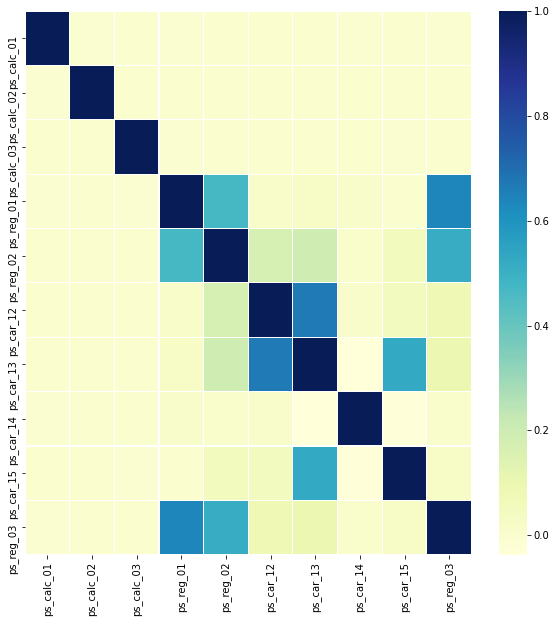

In [10]:
corrmat = Interval_variables_data.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [13]:
#print(corrmat)
#Inference 1
print("After seeing the heatmap We can say that ps_reg_01 is correlated with ps_reg_02,ps_reg_03 Which shows the Multicollinearity")
print("Almost all the features are independent")

After seeing the heatmap We can say that ps_reg_01 is correlated with ps_reg_02,ps_reg_03 Which shows the Multicollinearity
Almost all the features are independent


C:\Users\vikas.maurya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


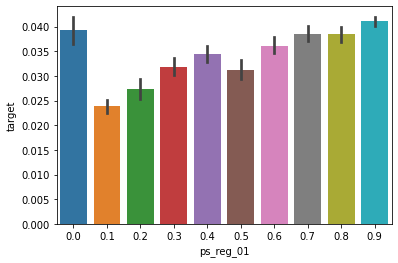

All the Interval Variable is Balanced with respect to target Values


In [11]:
#Interval_variables_data.head()
sns.barplot(Interval_variables_data['ps_reg_01'],data['target'])
plt.show()
#Inference 2
print("All the Interval Variable is Balanced with respect to target Values")

## 6.Write inferences from data on ordinal variables.

In [14]:
column_todrop_toget_ordinal=['ps_ind_14','ps_reg_03','ps_car_12','ps_car_13', 'ps_car_14', 'ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_reg_01','ps_reg_02']

Ordinal_variables_data=new_data.drop(column_todrop_toget_ordinal, axis = 1)

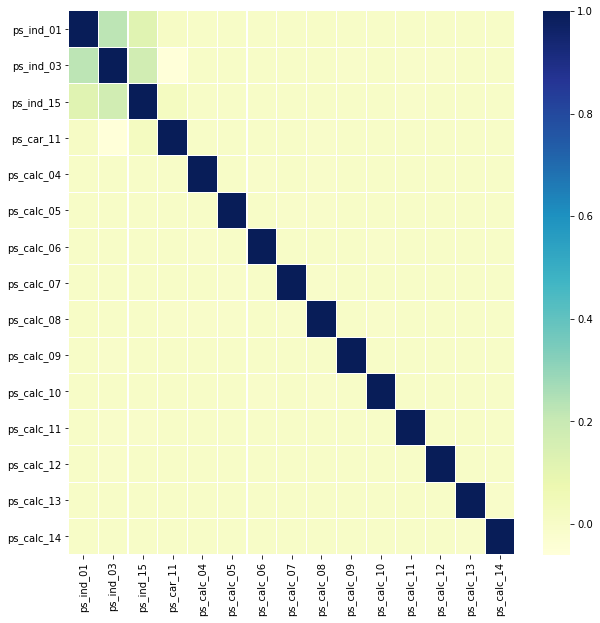

In [15]:
#Ordinal_variables_data.head(10)
corrmat = Ordinal_variables_data.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.show()

C:\Users\vikas.maurya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


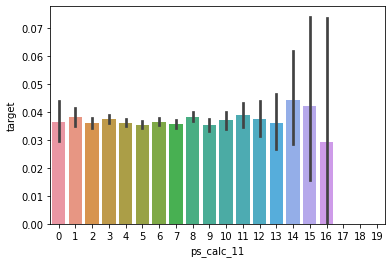

C:\Users\vikas.maurya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


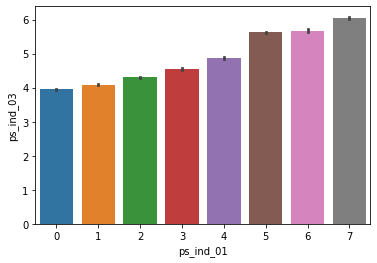

In [98]:
#test=data[column_todrop_toget_ordinal]+data["target"]

sns.barplot(Ordinal_variables_data['ps_calc_11'],data['target'])
plt.show()

sns.barplot(Ordinal_variables_data['ps_ind_01'],data['ps_ind_03'])
plt.show()

In [19]:
#Inference1

print("ps_ind_01 and ps_ind_03 is correlated to each other ")
print("It is balanced w.r.t to Target Data")

#Inference2
print("Most of the feature is independent of each other ")

ps_ind_01 and ps_ind_03 is correlated to each other 
It is balanced w.r.t to Target Data
Most of the feature is independent 


## 7.Write inferences from data on binary variables.

In [15]:
binary_variable_data=data[bi]

<AxesSubplot:>

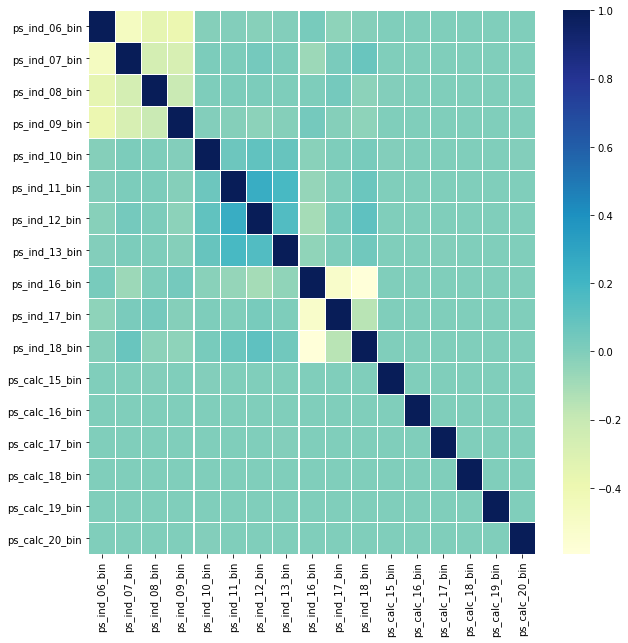

In [103]:
#binary_variable_data.head(5)
corrmat = binary_variable_data.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [20]:
#inference1
print("Data has 0 correlation between the columns it shows some -ve correlation between some columns")
#Inference2
print("Most of the feature is independent of each other ")

Data has 0 correlation between the columns it shows some -ve correlation between some columns
Most of the feature is independent of each other 


## 8.Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance


In [ ]:
x_zero=Y.value_counts()
diff=x_zero[0]-x_zero[1]
total=x_zero[0]+x_zero[1]
print("Target Variables are not balanced since difference between them is very high that is:",diff)
print("The proportion is wrong it has one class very high and the second class is very low",x_zero[0]/total,":",x_zero[1]/total)
print("The binary Data is less than 30% that is 3.6% in this case,whcih shows that sign of imbalance.")
perc = (data['target'].value_counts()/(data.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

Target Variables are not balanced since difference between them is very high that is: 551824
The proportion is wrong it has one class very high and the second class is very low 0.963552482140817 : 0.036447517859182946
The binary Data is less than 30% that is 3.6% in this case,whcih shows that sign of imbalance.


## 9.Whatshould be the preferred way in this case to balance the data?


In [39]:
#There Are various Methods,which can be applied to balance the data.

#1:Up-sample the minority class
#2:Down-sample the majority class
#3:Change your performance metric
#4:Penalize algorithms (cost-sensitive training)
#5:Use tree-based algorithms
#6:Create Synthetic Samples (Data Augmentation)=>Smote Algorithm
#7:Combine Minority Classes
#8:Reframe as Anomaly Detection


#In upsample we are adding more minority classes.Which may leads to overfitting but we can handle it letter.
#In downsample we are removing the majority class.Which leads to deleting important/relevant information,so according to me the 
#prefered way is Up-Sample.
#Other methods are also there but some of required modeling and other function so,which I will explore letter.

data_major=data[data.target==0]
data_minor=data[data.target==1]

#data_major
#print(data_major.target.value_counts())

# Upsample minority class
data_minority_upsampled = resample(data_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=int(len(data)*0.12+7000),    # to match majority class for 12% proportion
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_major, data_minority_upsampled])
 
# Display new class counts
data_upsampled.target.value_counts()

0    573518
1     78425
Name: target, dtype: int64

## 10.How many training records are there after achieving balance of 12 %? 

In [40]:
Y=data_upsampled["target"]

Y.unique()
Y.value_counts()
x_zero=Y.value_counts()
diff=x_zero[0]-x_zero[1]
total=x_zero[0]+x_zero[1]

print("The proportion of Data",x_zero[0]/total,":",x_zero[1]/total)
print("Without splitting the dataset")
print("For achieving balance of 12%.The Training records incrased to",len(Y))
print("After splitting the dataset.")
print("The Training record will be",int(len(Y)*0.8))


The proportion of Data 0.8797057411460818 : 0.12029425885391822
Without splitting the dataset
For achieving balance of 12%.The Training records incrased to 651943
After splitting the dataset.
The Training record will be 521554


### Smote For Upsamling that is balancing the data

In [11]:
#Method2
#Since it reduce chances of overfitting i.e. SMOTE Technique Predict the new samples
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 2

# make a new df made of all the columns, except the target class
features = data.iloc[:,2:]
predictor= data['target']
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(features, predictor)
X_res.shape

(1147036, 57)

In [21]:
#The missing value is represented as -1 in this given dataset
min_values_features=data.min()
number_of_missing_features=[]
for i in min_values_features.keys():
    if min_values_features[i]==-1:
        number_of_missing_features.append(i)
    #print(min_values_features[i])
#min_values_features.keys()

## 11.Which are the top two features in terms of missing values? 

In [25]:

for i in number_of_missing_features:
    print(data[i].value_counts())
    
print("After seeing the output we can say that ps_car_01_cat and  ps_car_03_cat are top two features in terms of missing values ")

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64
 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64
 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
-1.000000    107772
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 0.328824         1
 1.743560         1
 2.198437         1
 2.379207         1
 1.595306         1
Name: ps_reg_03, Length: 5013, dtype: int64
 11    207573
 7     179247
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5904
 2       2144
 1       1367
-1        107
Name: ps_car_01_cat, dtype: int64
-1    411231
 1    110709
 0     73272
Name: ps_car_03_cat, dtype: int64
-1    266551
 1    172667
 0    155994
Name: ps_car_05_cat, dtype: int64
 1    553148
 0     30575
-1     11489
Name: ps_car_07_cat, dtyp

## 12.In total how many features have missing values?

In [26]:
print("Number of features having Missing Values")
print(len(number_of_missing_features))
number_of_missing_features

Number of features having Missing Values
12


['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

## 13.What steps should be taken to handle the missing data?

In [8]:
#There Are vaious methods to deal with Missing Data
#1:-  Deleting Rows
#2:-  Replacing With Mean/Median/Mode
#3:-  Assigning An Unique Category
#4:-  Predicting The Missing Values
#5:-  Using Algorithms Which Support Missing Values

# I used the 2nd Method to handle the missing Data.
#missing_data_column=data[number_of_missing_features]
data.replace(-1,np.NaN,inplace=True)


data[data==-1].count()
#Categorical Variable Will be replaced by mode of the column

data['ps_ind_02_cat']=data['ps_ind_02_cat'].fillna(data['ps_ind_02_cat'].mode()[0])
data['ps_ind_04_cat']=data['ps_ind_04_cat'].fillna(data['ps_ind_04_cat'].mode()[0])
data['ps_ind_05_cat']=data['ps_ind_05_cat'].fillna(0)

data['ps_car_01_cat']=data['ps_car_01_cat'].fillna(data['ps_car_01_cat'].mode()[0])
data['ps_car_03_cat']=data['ps_car_03_cat'].fillna(data['ps_car_03_cat'].mode()[0])
data['ps_car_05_cat']=data['ps_car_05_cat'].fillna(data['ps_car_05_cat'].mode()[0])
data['ps_car_07_cat']=data['ps_car_07_cat'].fillna(data['ps_car_07_cat'].mode()[0])
data['ps_car_09_cat']=data['ps_car_09_cat'].fillna(data['ps_car_09_cat'].mode()[0])

#Continous variable will be replaced by mean of the column
data['ps_car_12']=data['ps_car_12'].fillna(data['ps_car_12'].mean())
data['ps_car_14']=data['ps_car_14'].fillna(data['ps_car_14'].mean())


data['ps_reg_03']=data['ps_reg_03'].fillna(data['ps_reg_03'].mean())
data['ps_car_11']=data['ps_car_11'].fillna(data['ps_car_11'].mode()[0])

data.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [9]:
display(data.dtypes) 
#data['ps_ind_05_cat'] = data['ps_ind_05_cat'].astype(int)
data.head(10)    

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat     float64
ps_ind_03           int64
ps_ind_04_cat     float64
ps_ind_05_cat     float64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat     float64
ps_car_02_cat       int64
ps_car_03_cat     float64
ps_car_04_cat       int64
ps_car_05_cat     float64
ps_car_06_cat       int64
ps_car_07_cat     float64
ps_car_08_cat       int64
ps_car_09_cat     float64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2            2.0          5            1.0   
1   9       0          1            1.0          7            0.0   
2  13       0          5            4.0          9            1.0   
3  16       0          0            1.0          2            0.0   
4  17       0          0            2.0          0            1.0   
5  19       0          5            1.0          4            0.0   
6  20       0          2            1.0          3            1.0   
7  22       0          5            1.0          4            0.0   
8  26       0          5            1.0          3            1.0   
9  28       1          1            1.0          2            0.0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0            0.0              0              1              0  ...   
1            0.0              0              0              1  ...   
2            0.0              0              0              1  ...   
3            0.0              1              0              0  ...   
4            0.0              1              0              0  ...   
5            0.0              0              0              0  ...   
6            0.0              0              1              0  ...   
7            0.0              1              0              0  ...   
8            0.0              0              0              1  ...   
9            0.0              0              1              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   
5           4           2           0           9               0   
6           3           0           0          10               0   
7           7           1           3           6               1   
8           4           2           1           5               0   
9           3           5           0           6               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   
5               1               0               1               1   
6               1               0               0               1   
7               0               1               0               1   
8               1               0               0               0   
9               1               0               0               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  
5               1  
6               0  
7               0  
8               1  
9               0  

[10 rows x 59 columns]

## 14.Which interval variables have strong correlation?

The Correlation with target value shows thatps_reg_01 and ps_reg_02 has strong Correlation 


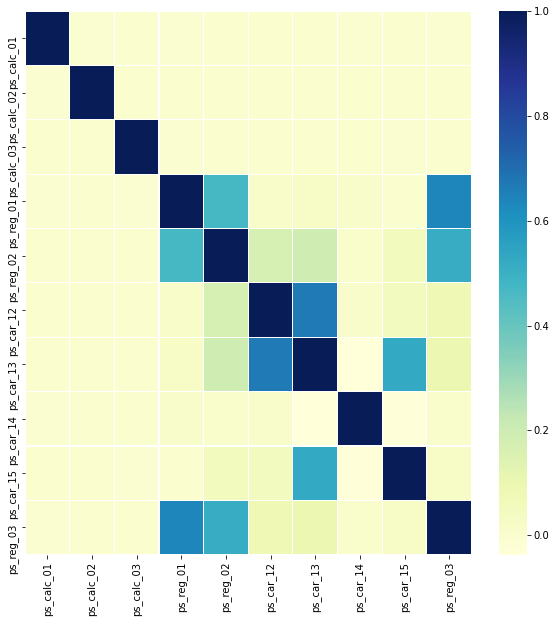

In [48]:
Interval_variables_data=new_data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_reg_01','ps_reg_02','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_reg_03']]

corrmat = Interval_variables_data.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
print("The Correlation with target value shows thatps_reg_01,ps_reg_02 and ps_reg_03 has strong Correlation ")

## 15.What's the level of correlation among ordinal features? 

<AxesSubplot:>

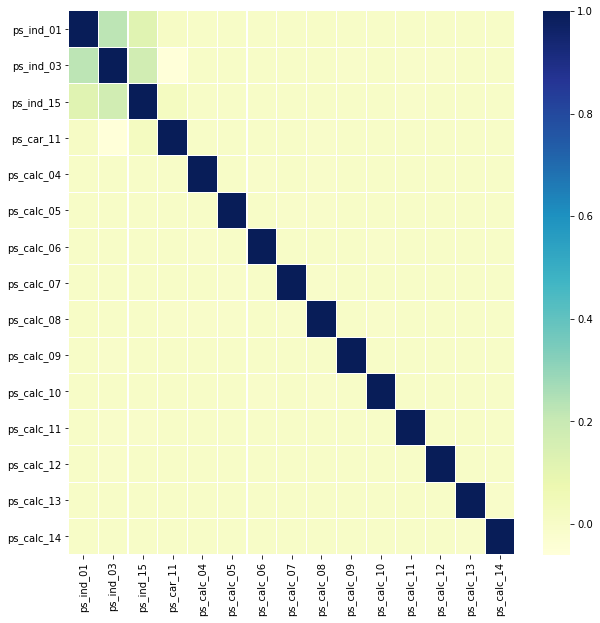

In [50]:
corm=Ordinal_variables_data.corr()
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corm, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
# The Level of correlation is mostly zero among itself but it has 0.2 and 0.12 with some ordinal features
#ps_ind_01 ,ps_ind_03 and ps_ind_15 has significant amount of Correlation
#print(Ordinal_variables_data.columns)


## 16.Implement Hot Encoding for categorical features

In [10]:
# creating one hot encoder object by default 
# entire data passed is one hot encoded   

#data[cat].to_csv("Catgorical.csv")
    

integer_encoded=array(data[cat])
print(integer_encoded.shape)
print(len(integer_encoded))
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
onehot_encoded.shape



#Manual One Hot Coding Example

# from numpy import argmax
# # define input string
# data = 'hello world'
# print(data)
# # define universe of possible input values
# alphabet = 'abcdefghijklmnopqrstuvwxyz '
# # define a mapping of chars to integers
# char_to_int = dict((c, i) for i, c in enumerate(alphabet))
# int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# # integer encode input data
# integer_encoded = [char_to_int[char] for char in data]
# print(integer_encoded)
# # one hot encode
# onehot_encoded = list()
# for value in integer_encoded:
# 	letter = [0 for _ in range(len(alphabet))]
# 	letter[value] = 1
# 	onehot_encoded.append(letter)
# print(onehot_encoded)
# # invert encoding
# inverted = int_to_char[argmax(onehot_encoded[0])]
# print(inverted)

(595212, 14)
595212


C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(595212, 175)

## 17.In nominal and interval features which features are suitable for StandardScaler?

In [164]:
#Nominal featues are not suitable for StandardScaler

#We can apply StandardScaler in interval features


#scaler = StandardScaler()
# Fit only to the training data
# scaler.fit(data[interval])
# Now apply the transformations to the data:
# data[interval] = scaler.transform(data[interval])


### Applying PCA for Dimension Reductionality

In [13]:

from sklearn.decomposition import PCA

scalar = StandardScaler() 
  
# fitting 
scalar.fit(X_res) 
scaled_data = scalar.transform(X_res)
  
# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
x_pca.shape 

(1147036, 2)

## 18.Summarize the learnings of ED




### Important insights from ED

In [ ]:
print("Data is higly imblanced, target distribtion is:")
print("0 = 96.36 %")
print("1 = 3.64 %"

In [ ]:
print(" Most of the features are uncorrelated")

In [ ]:
print("It contains 57 features and 1 target value to predict")

### important steps perform in ED

#### 1 Importing libraries : Import all the necessary libraries.

#### 2 Import the dataset  : Import the dataset using the read_csv() function of pandas. Since our dataset uses ‘;’ as a separator we are going to specify that as a parameter to the method.


#### 3 Describe the dataset : describe() method of pandas shows all the statistical values of the dataset like count, mean, standard deviation, minimum, maximum, etc.

#### 4 Checking for missing values: We have several methods to handle missing values but for that, we need to know how many features have the missing value. To check missing values pandas has a method named isnull(). We will sum up all the missing values of features so that we get an idea about how many features have missing values and how many missing values are there.We can apply mean,median and mode to fill the missing value


#### 5 Correlation between the columns:Finding a correlation between all the features helps to drop the highly correlated features. We can see the correlation between all the features using heatmap

#### 6 Checking the distribution of the data: we check the frequency of the range of values,so that we can show how must data is distributed


#### 7 Balancing the Data: Data is highly imbalance so applied SMOTE to do Upsampling to make data ratio 50:50

#### 8 Encoding The data: Applied one hot Encoding to encode the data so that data is more Machine readable

#### 9 Dimension Reductionality: To reduce the size of huge dataset into 2-3 features so that data is easliy understandable

#### 10 : Visualization: Plot Various graph plots to understand the data very well.

## 19.A picture is worth a thousand words, explain with different graphs and visualization techniques that you have learnt what is the data telling,



<AxesSubplot:>

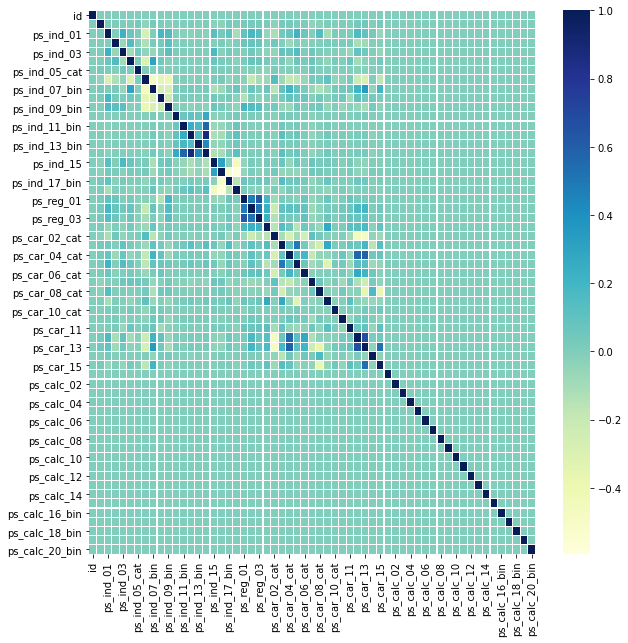

In [12]:
#I learn various graph to understand the dataset.
# Heatmap for correlation matrix is more useful for Exploratory Analysis when the dataset is very large
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


Percentge distribution of class '1' & class '0':

 0    96.355248
1     3.644752
Name: target, dtype: float64


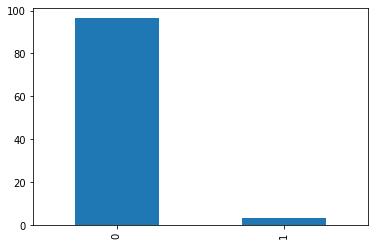

In [13]:
#To understand distribution between single column I used Bar chart
perc = (data['target'].value_counts()/(data.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

In [ ]:
# temp = data[:2000]
# sns.pairplot(data=temp, kind='scatter',diag_kind='kde')

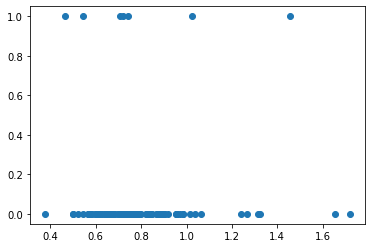

In [7]:
x=data['ps_car_13'].head(100)
y=data['target'].head(100)
plt.scatter(x, y)
plt.show()

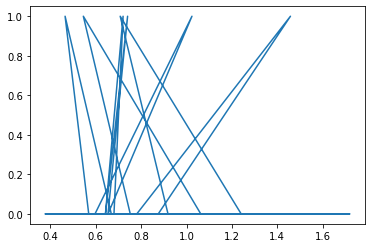

In [8]:
plt.plot(x, y)  # Plot the chart 
plt.show()

#### After plotting various graph chart i.e.Heamap,barchart,plot etc. I can say that data is highly imbalance and contain missing values.Additionally most of the data independent to each other and some are negatively coorelated to target.

## 20.Draw a mind map to high light the pain that can be identified from the dataset



In [ ]:
#optional

# Modeling Starts From Here

### Function to calculate Accuracy_Score,Classification_report etc. 

In [16]:
def accuracy_result(y_test, y_pred_test):
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    # USE THE IMPORTED CONFUSION MATRIX
    print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    false_positive_rate = round(FP / float(TN + FP),3)
    print('FPR: ', false_positive_rate)
    print('TPR/ RECALL/ SENSTIVITY: ', round(metrics.recall_score(y_test, y_pred_test), 3))
    print('PRECISION:' ,round(metrics.precision_score(y_test, y_pred_test), 3))
    specificity = round(TN / (TN + FP),3)
    print('SPECIFICITY: ',specificity)
    print('ACCURACY: ', np.round(metrics.accuracy_score(y_test, y_pred_test),3))
    print('ROC AUC: ', np.round(roc_auc_score(y_test, y_pred_test),3))
    print('Cohens kappa: ',np.round(cohen_kappa_score(y_test, y_pred_test),3))
    print('F1 score: ', np.round(f1_score(y_test, y_pred_test),3))
    print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_test))
    return 

### Without Balancing the data 

In [63]:
X_imbalance=data.iloc[:,2:]
Y_imbalance=data["target"]

In [64]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_imbalance,Y_imbalance,test_size=0.2,random_state=20)
x_train.shape

(917628, 57)

In [59]:
model_Log=LogisticRegression()
model_Log.fit(x_train1,y_train1)
print(model_Log.classes_)
predictions_log = model_Log.predict(x_test1)

accuracy_result(y_test1, predictions_log)

# print(classification_report(y_test, predictions_log))
# print(confusion_matrix(y_test, predictions_log))
# print(accuracy_score(y_test, predictions_log))

C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]

 CONFUSION MATRIX:
  [[114665      0]
 [  4378      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.963
ROC AUC:  0.5


C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Cohens kappa:  0.0
F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114665
           1       0.00      0.00      0.00      4378

   micro avg       0.96      0.96      0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
predictions_log.shape

(119043,)

## 1.The Simple LogisticRegression Model seem to have high accuracy. Is that what we need at all? What is the problem with this model?

In [6]:
print("The Logistic Regression giving very High Accuracy i.e. 96.32% but Data is highly imbalance which causes bias in the model")
print("It is predicting only one class.This will be going to perform very bad in future.We don't want this kind of models")

The Logistic Regression giving very High Accuracy i.e. 96.32% but Data is highly imbalance which causes bias in the model
It is predicting only one class.This will be going to perform very bad in future.We don't want this kind of models


## 2. Why do you think f1-score is 0.0?

In [ ]:
print("Since the  False Negative is 0 in the confusion Matrix,F-1 Score it the Arithmetic or Geometric Mean of Precision and Recall")
print("Hence the F-1 score is 0")
print("This all because of Data is imbalance")

## 3.What is the precision and recall score for the model?

In [ ]:
print("The Precision for class 0 is 0.96 and for class 1 is 0 ")
print("The Recall for class 0 is 1 and for class 1 is 0 ")

## 4. What is the most important inference you can draw from the result?

In [ ]:
print("Data is Highly Imbalance which causes irregular precision,recall,support and F-1 score for the class.")
print("In future if we deploy the model it will give wrong results so We need to Balance the data to get right model")

## 5. What is the accuracy score and f1-score for the improved Logistic Regression model?

In [22]:
# data_upsampled.head()
# X_improve=data_upsampled.iloc[:,2:]
# Y_improve=data_upsampled["target"]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.2,random_state=20)
x_train.shape

(917628, 57)

In [14]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.classes_


C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1], dtype=int64)

In [17]:
predictions_slog = model.predict(x_test)
accuracy_result(y_test, predictions_slog)


 CONFUSION MATRIX:
  [[70374 44757]
 [49983 64294]] 

FPR:  0.389
TPR/ RECALL/ SENSTIVITY:  0.563
PRECISION: 0.59
SPECIFICITY:  0.611
ACCURACY:  0.587
ROC AUC:  0.587
Cohens kappa:  0.174
F1 score:  0.576

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.60    115131
           1       0.59      0.56      0.58    114277

   micro avg       0.59      0.59      0.59    229408
   macro avg       0.59      0.59      0.59    229408
weighted avg       0.59      0.59      0.59    229408



In [14]:
#After Applying PCA
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_res,test_size=0.2,random_state=20)
x_train.shape
model_PCA=LogisticRegression()
model_PCA.fit(x_train,y_train)
model_PCA.classes_

C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1], dtype=int64)

In [15]:
#After Applying PCA
predictions_slog = model_PCA.predict(x_test)
accuracy_result(y_test, predictions_slog)


 CONFUSION MATRIX:
  [[73396 41735]
 [57739 56538]] 

FPR:  0.363
TPR/ RECALL/ SENSTIVITY:  0.495
PRECISION: 0.575
SPECIFICITY:  0.637
ACCURACY:  0.566
ROC AUC:  0.566
Cohens kappa:  0.132
F1 score:  0.532

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60    115131
           1       0.58      0.49      0.53    114277

   micro avg       0.57      0.57      0.57    229408
   macro avg       0.57      0.57      0.56    229408
weighted avg       0.57      0.57      0.56    229408



In [19]:
print("After Applying PCA not getting any significant imrovement to the model accuracy and f1_score")

After Applying PCA not getting any significant imrovement to the model accuracy and f1_score


## 6. Why do you think f1-score has improved?

In [ ]:
print("Since the data is now balanced which causes in improve of f1-score")
print("Precison and recall is also improves which significantly improve the f1-score")

## 7. For model LinearSVC play with parameters –dual, max_iter and see if there is any improvement

In [20]:
x_trainl, x_test, y_trainl, y_test = train_test_split(X_res, y_res,test_size=0.2,random_state=20)
svc_model = LinearSVC(dual=False,max_iter=1000)
print(svc_model)
svc_model.fit(x_trainl,y_trainl)
predictions_lsvc = svc_model.predict(x_test)
accuracy_result(y_test,predictions_lsvc)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

 CONFUSION MATRIX:
  [[70524 44607]
 [50190 64087]] 

FPR:  0.387
TPR/ RECALL/ SENSTIVITY:  0.561
PRECISION: 0.59
SPECIFICITY:  0.613
ACCURACY:  0.587
ROC AUC:  0.587
Cohens kappa:  0.173
F1 score:  0.575

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.60    115131
           1       0.59      0.56      0.57    114277

   micro avg       0.59      0.59      0.59    229408
   macro avg       0.59      0.59      0.59    229408
weighted avg       0.59      0.59      0.59    229408



In [16]:
print("For LinearSVC if we choose dual=True it will take more time to train since It tries to optimize but since n_samples > n_features we will choose dual=False")
print("As we change the max_iter it is not changing the accuracy that is no improvement ")

For LinearSVC if we choose dual=True it will take more time to train since It tries to optimize but since n_samples > n_features we will choose dual=False
As we change the max_iter it is not changing the accuracy


## 8. For --SVC with Imbalance Check & Feature Optimization & only 100K Records is there improvement in scores?

In [21]:
x_tr=x_train[:10000,:]
y_tr=y_train[:10000]

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tr, y_tr,test_size=0.2,random_state=20)
#Create a svm Classifier
clf = SVC(kernel='linear')
# FIT SVC ON TRAINING DATA
clf.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
predictions_svc=clf.predict(x_test)
accuracy_result(y_test,predictions_svc)


 CONFUSION MATRIX:
  [[663 338]
 [475 524]] 

FPR:  0.338
TPR/ RECALL/ SENSTIVITY:  0.525
PRECISION: 0.608
SPECIFICITY:  0.662
ACCURACY:  0.594
ROC AUC:  0.593
Cohens kappa:  0.187
F1 score:  0.563

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.66      0.62      1001
           1       0.61      0.52      0.56       999

   micro avg       0.59      0.59      0.59      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.60      0.59      0.59      2000



## 9. XGBoost is one the better classifiers --but still f1-score is very low. What could be the reason?

In [24]:
x_trainxg, x_test, y_trainxg, y_test = train_test_split(X_res, y_res,test_size=0.2,random_state=20)

In [25]:
xgbc = XGBClassifier()
model=xgbc.fit(x_trainxg,y_trainxg)

In [ ]:
#check the training accuracy with cross-validation and k-fold methods.
scores = cross_val_score(xgbc, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.98


In [30]:
predictions_xgbc = xgbc.predict(x_test)
accuracy_result(y_test,predictions_xgbc)


 CONFUSION MATRIX:
  [[115131      0]
 [  4600 109677]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.96
PRECISION: 1.0
SPECIFICITY:  1.0
ACCURACY:  0.98
ROC AUC:  0.98
Cohens kappa:  0.96
F1 score:  0.979

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    115131
           1       1.00      0.96      0.98    114277

   micro avg       0.98      0.98      0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



## 10. What is the increase in number of features after onehotencoding of the data?

In [45]:
df=pd.DataFrame(X_res,columns=['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'])

In [46]:
integer_encoded=array(df[cat])
print(integer_encoded.shape)
print(len(integer_encoded))
onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
onehot_encoded.shape

(1147036, 14)
1147036


C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


(1147036, 175)

In [47]:
df.drop(cat,axis=1,inplace=True)

In [48]:
df.shape
df1=pd.DataFrame(onehot_encoded)

In [49]:
onehot_data=pd.concat([df, df1], axis=1) 

In [50]:
onehot_data.shape

(1147036, 218)

In [51]:
print("Number of features increased from 57 to 218")
#y_res.shape

Number of features increased from 57 to 218


## 11. Is there any improvement in scores after encoding?

In [52]:
x_train, x_test, y_train, y_test = train_test_split(onehot_data, y_res,test_size=0.2,random_state=20)
model_Log=LogisticRegression()
model_Log.fit(x_train,y_train)
print(model_Log.classes_)
predictions_log = model_Log.predict(x_test)

accuracy_result(y_test, predictions_log)

C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]

 CONFUSION MATRIX:
  [[87191 27940]
 [33653 80624]] 

FPR:  0.243
TPR/ RECALL/ SENSTIVITY:  0.706
PRECISION: 0.743
SPECIFICITY:  0.757
ACCURACY:  0.732
ROC AUC:  0.731
Cohens kappa:  0.463
F1 score:  0.724

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74    115131
           1       0.74      0.71      0.72    114277

   micro avg       0.73      0.73      0.73    229408
   macro avg       0.73      0.73      0.73    229408
weighted avg       0.73      0.73      0.73    229408



In [ ]:
print("After Encoding the model performed well than previous it is giving higher accuracy")

## 12. If not missing a positive sample is the priority which model is best so far?

In [ ]:
print(confusion_matrix(y_test,predictions_slog))
# CONFUSION MATRIX:
# [[73396 41735]
# [57739 56538]] 


print(confusion_matrix(y_test,predictions_lsvc))

#CONFUSION MATRIX:
#  [[70524 44607]
# [50190 64087]] 


print(confusion_matrix(y_test,predictions_xgbc))
#CONFUSION MATRIX:
# [[115131      0]
#[  4600 109677]] 

### XGBoost model is performing best.Count of missing positive sample is 4600 only.

## 13. If not marking negative sample as positive is top priority, which model is best so far?

In [ ]:
print(confusion_matrix(y_test,predictions_slog))
# CONFUSION MATRIX:
# [[73396 41735]
# [57739 56538]] 


print(confusion_matrix(y_test,predictions_lsvc))

#CONFUSION MATRIX:
#  [[70524 44607]
# [50190 64087]] 


print(confusion_matrix(y_test,predictions_xgbc))
#CONFUSION MATRIX:
# [[115131      0]
#[  4600 109677]] 

### XGBoost model is performing best. No misclassification for negative sample as positive.

## 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

In [53]:
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = adaBoost.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_ada = model1.predict(x_test)


In [55]:
accuracy_result(y_test, y_pred_ada)
y_test


 CONFUSION MATRIX:
  [[114699    432]
 [  7865 106412]] 

FPR:  0.004
TPR/ RECALL/ SENSTIVITY:  0.931
PRECISION: 0.996
SPECIFICITY:  0.996
ACCURACY:  0.964
ROC AUC:  0.964
Cohens kappa:  0.928
F1 score:  0.962

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    115131
           1       1.00      0.93      0.96    114277

   micro avg       0.96      0.96      0.96    229408
   macro avg       0.97      0.96      0.96    229408
weighted avg       0.97      0.96      0.96    229408



array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### No improvement in AdaBoost model result because In my case XGBoost model giving much more better result (Accuracy and F1 score) in compare to AdaBoost model.

In [11]:
pickle.dump(model1 , open('claim.pkl', 'wb'))

## 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size

In [ ]:
check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
gridsearchcv = GridSearchCV(mlpclassifier, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(x_train, y_train)

# Prediction on x_test
predictions_mlp=mlp.predict(x_test)
accuracy_result(y_test,predictions_mlp)

C:\Users\vikas.maurya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



 CONFUSION MATRIX:
  [[114558    573]
 [ 15663  98614]] 

FPR:  0.005
TPR/ RECALL/ SENSTIVITY:  0.863
PRECISION: 0.994
SPECIFICITY:  0.995
ACCURACY:  0.929
ROC AUC:  0.929
Cohens kappa:  0.858
F1 score:  0.924

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    115131
           1       0.99      0.86      0.92    114277

   micro avg       0.93      0.93      0.93    229408
   macro avg       0.94      0.93      0.93    229408
weighted avg       0.94      0.93      0.93    229408



### In Generally, you can't analytically calculate the number of layers or the number of nodes to use per layer in an ANN to address a specific real-world predictive modeling problem, But there are many methods for determining the correct number of neurons to use in the hidden layers, such as the following:

### The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
### The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
### The no. of hidden neurons should be less than twice the size of the input layer.

## 16. At what layer size we get the best f1-score?

In [ ]:
print("After Applying HyperParameter Tuning At layer 10,I am getting accuracy around 93%")

## 17.Help the management decide which model to signoff and help the management take informed decision based on the evaluation metrics –explain in brief the pros-cons of the best 3 models

In [68]:

'''
Log_Reg(Before Resamp)

               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114665
           1       0.00      0.00      0.00      4378
            
Log_Reg(After Resamp)
                precision    recall  f1-score   support

           0       0.58      0.61      0.60    115131
           1       0.59      0.56      0.58    114277
SVC        
              precision    recall  f1-score   support

           0       0.58      0.61      0.60    115131
           1       0.59      0.56      0.57    114277
XGBoost   
                 precision    recall  f1-score   support

           0       0.96      1.00      0.98    115131
           1       1.00      0.96      0.98    114277
AdaBoost
                 precision    recall  f1-score   support

           0       0.94      1.00      0.97    115131
           1       1.00      0.93      0.96    114277
MLPClassifier
                precision    recall  f1-score   support

           0       0.88      1.00      0.93    115131
           1       0.99      0.86      0.92    114277
'''

'\nLog_Reg(Before Resamp)\n\n               precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98    114665\n           1       0.00      0.00      0.00      4378\n            \nLog_Reg(After Resamp)\n                precision    recall  f1-score   support\n\n           0       0.58      0.61      0.60    115131\n           1       0.59      0.56      0.58    114277\nSVC        \n              precision    recall  f1-score   support\n\n           0       0.58      0.61      0.60    115131\n           1       0.59      0.56      0.57    114277\nXGBoost   \n                 precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98    115131\n           1       1.00      0.96      0.98    114277\nAdaBoost\n                 precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97    115131\n           1       1.00      0.93      0.96    114277\nMLPClassifier\n                precision    recall  f1-

In [70]:
data = {'Log_Reg(Before Resamp)':[0,96.3],
        'Log_Reg(After Resamp)':[58,57.8],
        'SVC':[57,57.8],
        'XGBoost':[98,98],
        'AdaBoost':[96,96.4],
        'MLPClassifier':[92,92.9]
        }

df_result=pd.DataFrame(data, index = ['F1_score', 'Accuracy']).T
print(df_result)

F1_score  Accuracy
Log_Reg(Before Resamp)       0.0      96.3
Log_Reg(After Resamp)       58.0      57.8
SVC                         57.0      57.8
XGBoost                     98.0      98.0
AdaBoost                    96.0      96.4
MLPClassifier               92.0      92.9

### After observing the above table I can suggest the management to go for the XGBoost ,since it is giving very High Accuracy and F-1 Score

## 18.Flask website that holds the final predictive model (give some sample examples where the model is able to predict different outputs based on changes input parameter)

In [ ]:
model = pickle.load(open('claim.pkl', 'rb'))

app = Flask(__name__)


@app.route('/')
def hello_world():
    return render_template("auto_insurance_claim.html")



@app.route('/predict',methods=['POST','GET'])
def predict():
    int_features=[int(x) for x in request.form.values()]
    final=[np.array(int_features)]
    print(int_features)
    print(final)
    prediction=model.predict(final)
    print(prediction)

    if prediction==0:
        return render_template('auto_insurance_claim.html',pred="Owner will not initiate an auto insurance claim for next year")
    else:
        return render_template('auto_insurance_claim.html',pred="Owner will initiate an auto insurance claim for next year")



if __name__ == "__main__":
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)
    #app.run(port=1234,debug=True)


 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jan/2021 23:34:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2021 23:34:38] "GET /static/css2/style.css HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2021 23:34:39] "GET /.js/materialize.js HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2021 23:34:39] "GET /js/init.js HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2021 23:36:54] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2021 23:36:54] "GET /static/css2/style.css HTTP/1.1" 404 -


[1, 0, 3, 3, 3, 3, 1, 5, 5, 7, 0, 0, 0, 10, 0, 0, 0, 1, 10, 10, 10, 0, 10, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 3, 10, 2, 10, 101, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 10, 0]
[array([  1,   0,   3,   3,   3,   3,   1,   5,   5,   7,   0,   0,   0,
        10,   0,   0,   0,   1,  10,  10,  10,   0,  10,   1,   1,   0,
         1,   1,   0,   1,   1,   0,   1,   0,   1,   0,   0,   1,   3,
        10,   2,  10, 101,   0,   1,   0,   0,   0,   1,   2,   0,   1,
         2,   0,   2,  10,   0])]
[0]


127.0.0.1 - - [29/Jan/2021 23:36:54] "GET /.js/materialize.js HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2021 23:36:54] "GET /js/init.js HTTP/1.1" 404 -


## 19. Can you showcase to the management,what changes in the parameter can help improve the profit, what is the likelihood of profit boost that can be expected after deploying the model

In [4]:
temp = data[:200000]
_X = temp.drop(['id','target'],axis =1)
_y=temp.target
clf=RandomForestClassifier(n_estimators=100)
clf.fit(_X , _y)

feature_imp = pd.Series(clf.feature_importances_,index=_X.columns).sort_values(ascending=False)
imp = pd.DataFrame(feature_imp).reset_index()
imp.columns = ["Features", 'Imp']

imp['Imp'] = (imp['Imp']/max(imp['Imp']))*100
col = imp[imp["Imp"]>25]['Features'].tolist()

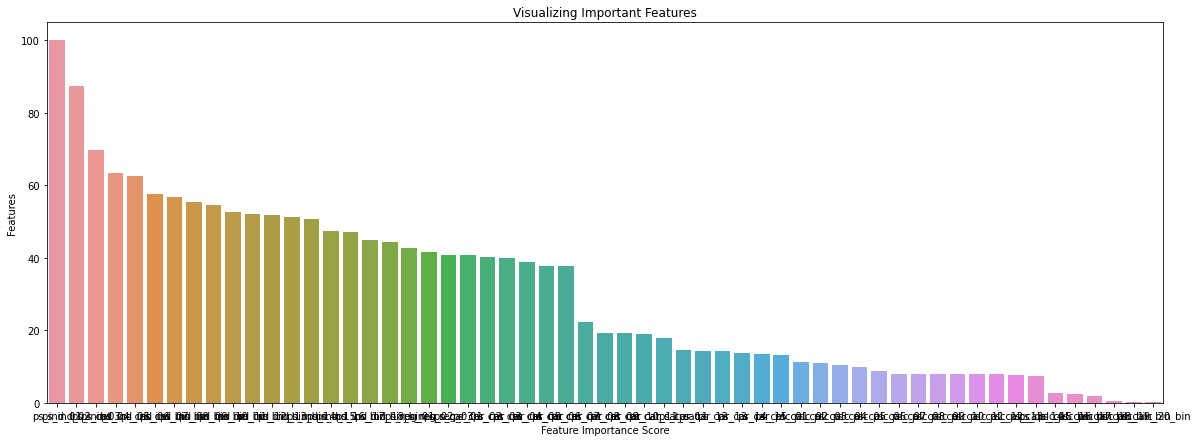

In [5]:
# Creating a bar plot
plt.figure(figsize = (20,7))
sns.barplot(x=_X.columns, y=imp.Imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Top 10 ordered important features,This feature can be key since auto insurance claim is highly dependent on this.If company improve on this below parameters,it will be more profitable to the business.

In [6]:
print(imp[:10].Features);

0        ps_car_13
1        ps_reg_03
2        ps_car_14
3       ps_calc_14
4       ps_calc_10
5       ps_calc_11
6    ps_car_11_cat
7        ps_ind_15
8        ps_ind_03
9       ps_calc_02
Name: Features, dtype: object


#### After deploying the model customer can self evaluate his/her self, which will create a positive image of company in the customer's eyes.Customer will start trusting this company and it will create more number of insurance claim,Which Evantully boost  the profit of the company

# Conclusion

## Since I am limited in time,I am able to apply limited number of algorithms in which XGBoost is the best one.

## We can apply various other models and apply different technique to reduce the number of features to get higher Accuracy or Better Model.

## I learned Exploratory Data Analysis ,Data Visualization and Machine Learning Modeling